In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
labels_2hop_all = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6',
               'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
               'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
               'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
               'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36']
labels_2hop_3 = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6']
labels_2hop_4 = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
               'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
               'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
               'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36']

labels_gr_all = ['4-1', '4-2', '4-3', '4-4', '4-5', '4-6',
                '5-1', '5-2', '5-3', '5-4', '5-5', '5-6', '5-7', '5-8', '5-9', '5-10', 
                '5-11', '5-12', '5-13', '5-14', '5-15', '5-16', '5-17', '5-18', '5-19', '5-20', '5-21']
labels_gr_4 = ['4-1', '4-2', '4-3', '4-4', '4-5', '4-6']
labels_gr_5 = ['5-1', '5-2', '5-3', '5-4', '5-5', '5-6', '5-7', '5-8', '5-9', '5-10', 
               '5-11', '5-12', '5-13', '5-14', '5-15', '5-16', '5-17', '5-18', '5-19', '5-20', '5-21']


In [3]:
def load_json_convert(filepath):
    with open(f'./{filepath}/output.json') as f:
        real = json.load(f)

    with open(f'./{filepath}/random_output.json') as f:
        random = json.load(f)
    
    real = pd.DataFrame(real)
    real['domain'] = real['dataset'].str.split('-').str[0]
    random = pd.DataFrame(random)
    random['domain'] = random['dataset'].str.split('-').str[0]
    
    return real, random

In [79]:
def sig_profile(real, random, label, datasets, domain = "all"):
        
    # Prepare for plotting
    plt.figure(figsize=(10, 8))

    srp_data = []
    
    if domain != "all":
        real = real[real['domain'] == domain]
        random = random[random['domain'] == domain]
            
    for data in datasets:
        real_data = real[real['dataset'] == data][label]
        random_data = random[random['dataset'] == data][label]

        # Compute Delta_i for each subgraph
        epsilon = 0.1
        delta_i = {}
        for key in list(real_data):
            N_real_i = real_data[key].values
            N_rand_i = random_data[key].values
            delta_i[key] = (N_real_i - N_rand_i) / (N_real_i + N_rand_i + epsilon)

        # Normalize Delta_i to get SRP_i
        sum_delta_squared = sum([delta**2 for delta in delta_i.values()])
        srp_i = [delta / np.sqrt(sum_delta_squared) for delta in delta_i.values()]

        srp_data.append(srp_i)

        # Plot the Subgraph Ratio Profile
        plt.plot(label, srp_i, marker='o', label=f'{data}')

    if domain == "all":
        df = pd.DataFrame(srp_data, index = datasets).T
        correlation_matrix = df.corr(method='pearson')
    else:
        correlation_matrix = None

    # Plot settings
    plt.xlabel('2Hoplets Index')
    plt.ylabel('Normalized Significance Profile Score')
    plt.title(f'{domain} datasets')
    plt.ylim(-0.5, 0.5)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.legend()
    plt.xticks(rotation=45)

    # num_labels_to_show = 8
    # step = len(labels) // (num_labels_to_show - 1)
    # visible_positions = list(range(0, len(labels), step))[:num_labels_to_show]
    # visible_labels = [labels[i] for i in visible_positions]
    # plt.xticks(visible_positions, visible_labels)


    # Save the plot
    # filename = f'{domain}_extend_3.png'
    # plt.savefig(f'./figure/{filename}')

    # Display the plot
    plt.show()
    return correlation_matrix

In [80]:
def conf_mat(labels, correlation_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='YlOrBr', cbar=True, square=True, vmin=-0.3, vmax=1)
    plt.title('Correlation Coefficient Matrix')
    plt.xlabel('Datasets')
    plt.ylabel('Datasets')
    # Add custom colored labels
    ax = plt.gca()
    ax.set_xticks(np.arange(len(labels)) + 0.5)
    ax.set_yticks(np.arange(len(labels)) + 0.5)
    ax.set_xticklabels(labels, rotation=90, ha='right', rotation_mode='anchor')
    ax.set_yticklabels(labels, rotation=0)
    #ax.set_xticklabels([''] * len(labels))
    #ax.set_yticklabels([''] * len(labels))
    plt.show()

### For Each Domain

In [86]:
datasets = [
            'ca-HepPh', 'ca-GrQc', 'ca-netscience', #'ca-dblp-2012',
            'web-arabic-2005', 'web-indochina-2004', #'web-sk-2005', 'web-webbase', 'web-polblogs',  'web-EPA',  'web-edu', 
            #'email-univ','email-Enron', #'email-EU',
            'socfb-Haverford76', 'socfb-Hamilton46', 'socfb-Middlebury45', #'socfb-UC64', 'socfb-UCSC68',
            'tags-ask-ubuntu', 'tags-math-sx',
            'roadNet-CA', 'roadNet-TX', 'roadNet-PA',
            ]
real, random = load_json_convert("extend_output")

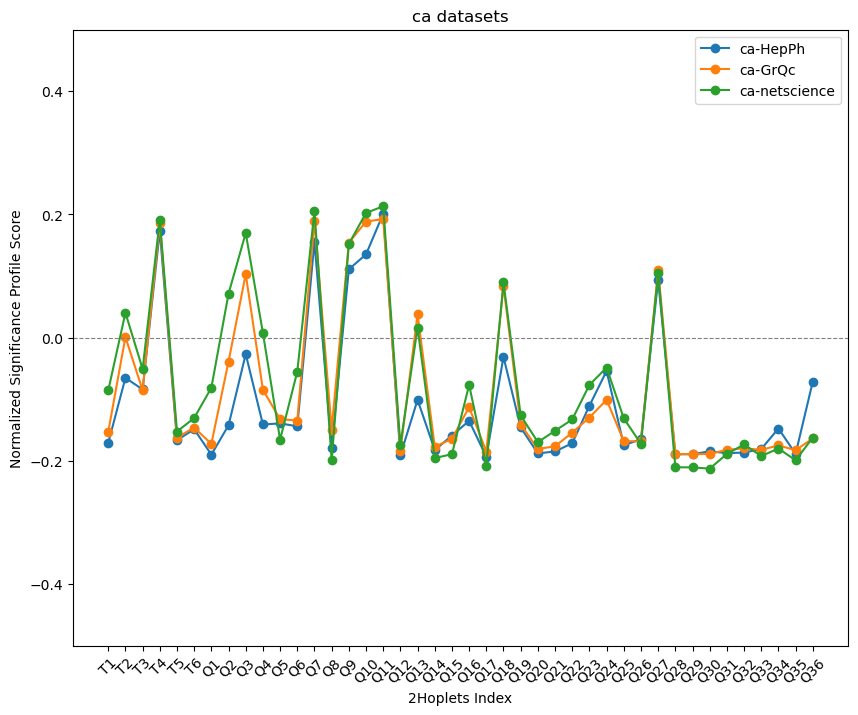

In [87]:
domain = real[real['dataset'] == 'datasets']['domain']
corr = sig_profile(real, random, labels_2hop_all, datasets, domain='ca')

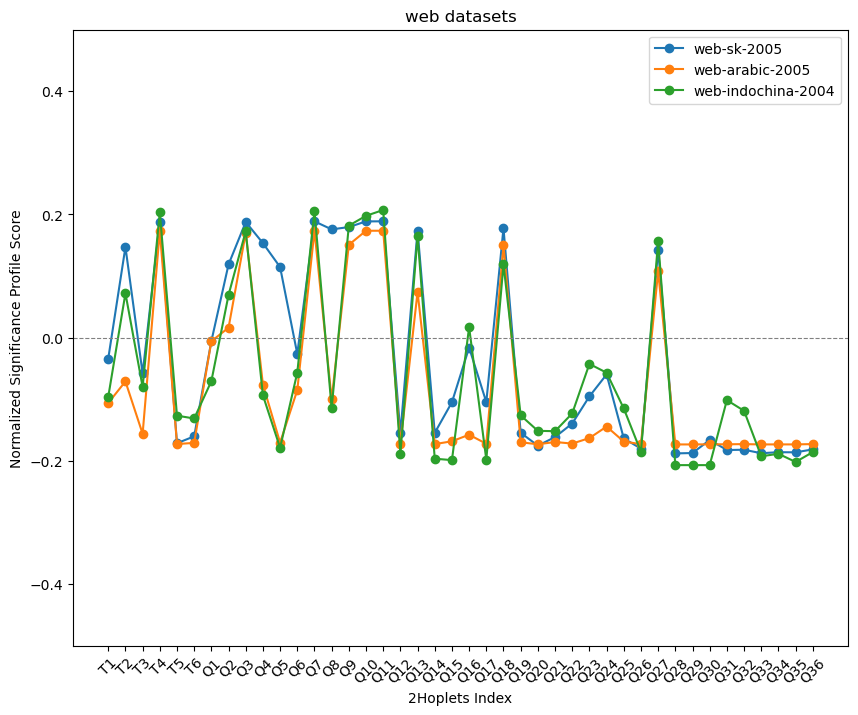

In [83]:
corr = sig_profile(real, random, labels_2hop_all, datasets, domain='web')

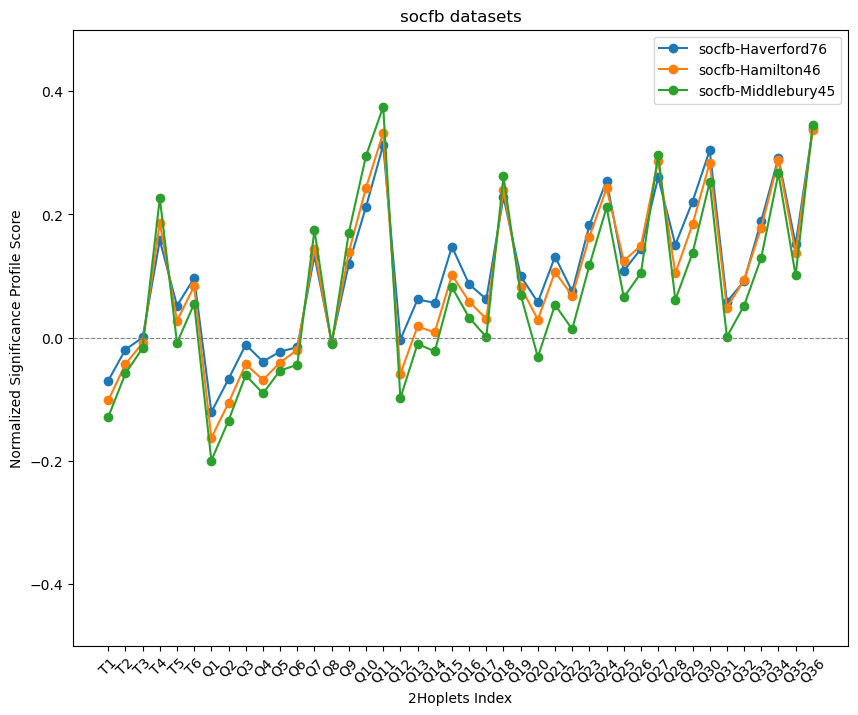

In [84]:
corr = sig_profile(real, random, labels_2hop_all, datasets, domain='socfb')

### Total

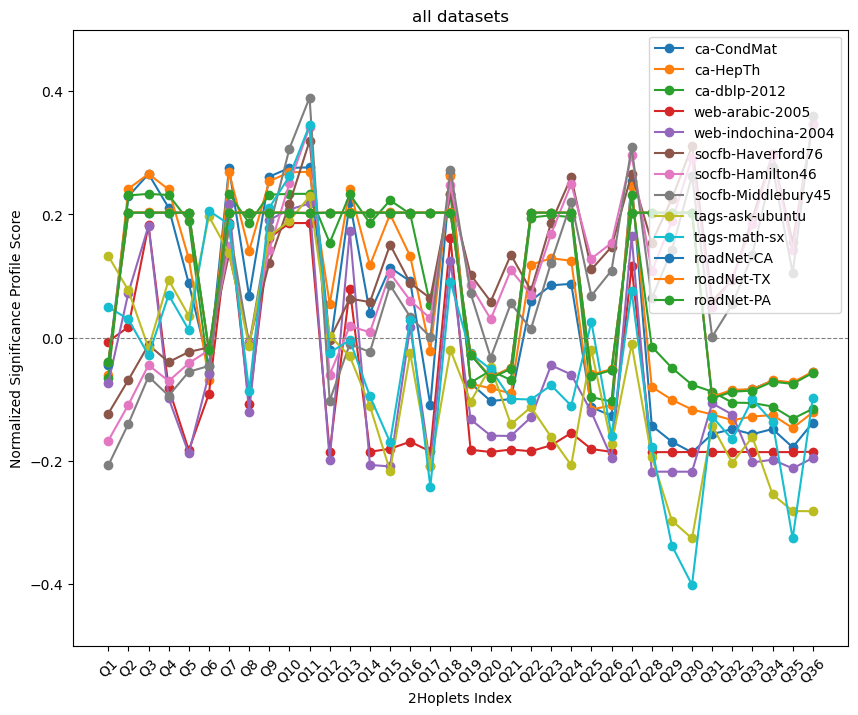

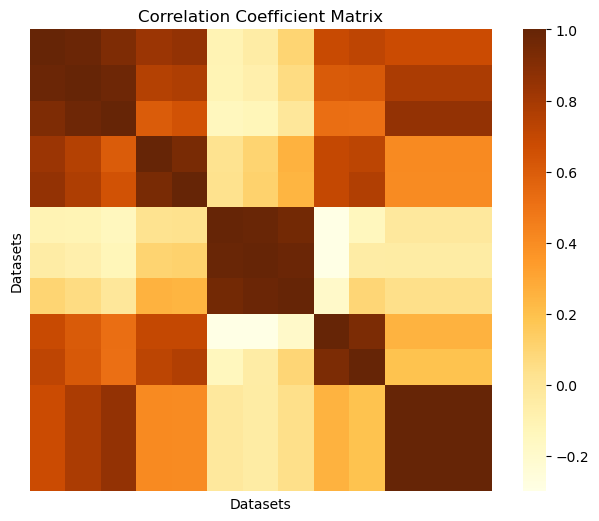

In [124]:
datasets = [
            'ca-CondMat','ca-HepTh',  'ca-dblp-2012', #'ca-AstroPh', 'ca-HepPh', 'ca-GrQc', 'ca-netscience',
            'web-arabic-2005', 'web-indochina-2004',  #'web-edu',  'web-sk-2005', 'web-webbase', 'web-polblogs',  'web-EPA',
            #'email-univ','email-Enron', #'email-EU',
            'socfb-Haverford76', 'socfb-Hamilton46', 'socfb-Middlebury45', #'socfb-UC64', 'socfb-UCSC68',
            'tags-ask-ubuntu', 'tags-math-sx',
            'roadNet-CA', 'roadNet-TX', 'roadNet-PA',
            ]
real, random = load_json_convert("extend_output")
domain = real[real['dataset'] == 'datasets']['domain']
corr_mat = sig_profile(real, random, labels_2hop_4, datasets)
conf_mat(domain, corr_mat)

In [125]:
corr_mat

,ca-CondMat,ca-HepTh,ca-dblp-2012,web-arabic-2005,web-indochina-2004,socfb-Haverford76,socfb-Hamilton46,socfb-Middlebury45,tags-ask-ubuntu,tags-math-sx,roadNet-CA,roadNet-TX,roadNet-PA
ca-CondMat,1.000000,0.981956,0.919144,0.829858,0.853256,-0.102105,-0.047258,0.098182,0.690117,0.719111,0.676791,0.676959,0.677154
ca-HepTh,0.981956,1.000000,0.972135,0.748666,0.768739,-0.109918,-0.073343,0.065021,0.607212,0.617566,0.779530,0.779575,0.779625
ca-dblp-2012,0.919144,0.972135,1.000000,0.600725,0.646536,-0.145394,-0.126627,-0.006821,0.520722,0.514834,0.856689,0.856690,0.856652
web-arabic-2005,0.829858,0.748666,0.600725,1.000000,0.938777,0.029860,0.105121,0.253527,0.698735,0.722476,0.407463,0.407946,0.408215
web-indochina-2004,0.853256,0.768739,0.646536,0.938777,1.000000,0.034015,0.114022,0.245763,0.696230,0.758899,0.402837,0.403226,0.403305
socfb-Haverford76,-0.102105,-0.109918,-0.145394,0.029860,0.034015,1.000000,0.986890,0.954318,-0.422408,-0.146207,-0.015627,-0.017013,-0.018046
socfb-Hamilton46,-0.047258,-0.073343,-0.126627,0.105121,0.114022,0.986890,1.000000,0.981504,-0.328055,-0.048154,-0.041979,-0.043298,-0.044334
socfb-Middlebury45,0.098182,0.065021,-0.006821,0.253527,0.245763,0.954318,0.981504,1.000000,-0.185694,0.091390,0.044265,0.043059,0.042162
tags-ask-ubuntu,0.690117,0.607212,0.520722,0.698735,0.696230,-0.422408,-0.328055,-0.185694,1.000000,0.927124,0.252896,0.253690,0.254900
tags-math-sx,0.719111,0.617566,0.514834,0.722476,0.758899,-0.146207,-0.048154,0.091390,0.927124,1.000000,0.189921,0.190281,0.191234


In [126]:
def calculate_average_correlations(correlation_matrix, domain_indices):
    domain_intra_corr = {}
    domain_inter_corr = {}
    intra_domain_corr = []
    inter_domain_corr = []

    for domain1, indices1 in domain_indices.items():
        for domain2, indices2 in domain_indices.items():
            corrs = correlation_matrix.loc[indices1, indices2].values.flatten()
            if domain1 == domain2:
                corrs = [corr for corr in corrs if corr != 1.0]
                mean_corr = np.mean(corrs)
                domain_intra_corr[(domain1, domain2)] = mean_corr
                intra_domain_corr.extend(corrs)
            else:
                mean_corr = np.mean(corrs)
                domain_inter_corr[(domain1, domain2)] = mean_corr
                inter_domain_corr.extend(corrs)

    average_intra_domain_corr = np.mean(intra_domain_corr) 
    average_inter_domain_corr = np.mean(inter_domain_corr)

    return domain_intra_corr, domain_inter_corr, average_intra_domain_corr, average_inter_domain_corr

# 도메인 별 유사도 계산
domains_indices = {
    'ca': ['ca-CondMat','ca-HepTh',  'ca-dblp-2012'],
    'web' : ['web-arabic-2005', 'web-indochina-2004'],
    'socfb' : ['socfb-Haverford76', 'socfb-Hamilton46', 'socfb-Middlebury45'],
    'tags': ['tags-ask-ubuntu', 'tags-math-sx'],
    'roadNet' : ['roadNet-CA', 'roadNet-TX', 'roadNet-PA']
}

domain_intra_corr, domain_inter_corr, average_intra_domain_corr, average_inter_domain_corr = calculate_average_correlations(corr_mat, domains_indices)

# 도메인 별 유사도 출력
print("Domain intra-correlations:")
for domains, corr in domain_intra_corr.items():
    print(f'{domains}: {corr:.4f}')

print("\nDomain inter-correlations:")
for domains, corr in domain_inter_corr.items():
    print(f'{domains}: {corr:.4f}')

# 평균 intra-domain 및 inter-domain 유사도 출력
print(f'\nAverage intra-domain correlation: {average_intra_domain_corr:.4f}')
print(f'Average inter-domain correlation: {average_inter_domain_corr:.4f}')


Domain intra-correlations:
('ca', 'ca'): 0.9577
('web', 'web'): 0.9388
('socfb', 'socfb'): 0.9742
('tags', 'tags'): 0.9271
('roadNet', 'roadNet'): 1.0000

Domain inter-correlations:
('ca', 'web'): 0.7413
('ca', 'socfb'): -0.0498
('ca', 'tags'): 0.6116
('ca', 'roadNet'): 0.7711
('web', 'ca'): 0.7413
('web', 'socfb'): 0.1304
('web', 'tags'): 0.7191
('web', 'roadNet'): 0.4055
('socfb', 'ca'): -0.0498
('socfb', 'web'): 0.1304
('socfb', 'tags'): -0.1732
('socfb', 'roadNet'): -0.0056
('tags', 'ca'): 0.6116
('tags', 'web'): 0.7191
('tags', 'socfb'): -0.1732
('tags', 'roadNet'): 0.2222
('roadNet', 'ca'): 0.7711
('roadNet', 'web'): 0.4055
('roadNet', 'socfb'): -0.0056
('roadNet', 'tags'): 0.2222

Average intra-domain correlation: 0.9693
Average inter-domain correlation: 0.3126


In [122]:
def calculate_average_correlations(correlation_matrix, domain_indices):
    domain_intra_corr = {}
    domain_inter_corr = {}
    intra_domain_corr = []
    inter_domain_corr = []

    for domain1, indices1 in domain_indices.items():
        for domain2, indices2 in domain_indices.items():
            corrs = correlation_matrix.loc[indices1, indices2].values.flatten()
            if domain1 == domain2:
                corrs = [corr for corr in corrs if corr != 1.0]
                mean_corr = np.mean(corrs)
                domain_intra_corr[(domain1, domain2)] = mean_corr
                intra_domain_corr.extend(corrs)
            else:
                mean_corr = np.mean(corrs)
                domain_inter_corr[(domain1, domain2)] = mean_corr
                inter_domain_corr.extend(corrs)

    print(intra_domain_corr)
    print(inter_domain_corr)
    average_intra_domain_corr = np.mean(intra_domain_corr) 
    average_inter_domain_corr = np.mean(inter_domain_corr)

    return domain_intra_corr, domain_inter_corr, average_intra_domain_corr, average_inter_domain_corr

# 도메인 별 유사도 계산
domains_indices = {
    'ca': ['ca-HepPh', 'ca-GrQc', 'ca-netscience'],
    'socfb' : ['socfb-Haverford76', 'socfb-Hamilton46', 'socfb-Middlebury45'],
    'tags': ['tags-ask-ubuntu', 'tags-math-sx'],
    'roadNet' : ['roadNet-CA', 'roadNet-TX', 'roadNet-PA']
}

domain_intra_corr, domain_inter_corr, average_intra_domain_corr, average_inter_domain_corr = calculate_average_correlations(corr_mat, domains_indices)

# 도메인 별 유사도 출력
print("Domain intra-correlations:")
for domains, corr in domain_intra_corr.items():
    print(f'{domains}: {corr:.4f}')

print("\nDomain inter-correlations:")
for domains, corr in domain_inter_corr.items():
    print(f'{domains}: {corr:.4f}')

# 평균 intra-domain 및 inter-domain 유사도 출력
print(f'\nAverage intra-domain correlation: {average_intra_domain_corr:.4f}')
print(f'Average inter-domain correlation: {average_inter_domain_corr:.4f}')


KeyError: "None of [Index(['ca-HepPh', 'ca-GrQc', 'ca-netscience'], dtype='object')] are in the [index]"

4 :  0.98 0.87

5 :  0.95 0.84

4+5 : 0.96 0.84